In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

BASE_dir = os.getcwd()
DATA_PATH = os.path.abspath(BASE_dir + '\..\data\smart_home_energy.csv')
FIG_PATH = os.path.abspath(BASE_dir + '/../reports/Milestone1/figures')

df_initial = pd.read_csv(DATA_PATH)
df_initial

,home_id,timestamp,device_id,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,price_kWh
0,1,2022-01-01 00:00:00,air_conditioner1,air_conditioner,bedroom,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
1,1,2022-01-01 00:00:00,light1,light,living_room,on,105.880000,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
2,1,2022-01-01 00:00:00,tv1,tv,living_room,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
3,1,2022-01-01 00:00:00,fridge1,fridge,kitchen,on,223.460000,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
4,1,2022-01-01 00:00:00,washer1,washer,laundry_room,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,5,0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751995,10,2022-12-31 23:45:00,air_conditioner10,air_conditioner,bedroom,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,5,23,1500
1751996,10,2022-12-31 23:45:00,light10,light,living_room,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,5,23,1500
1751997,10,2022-12-31 23:45:00,tv10,tv,living_room,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,5,23,1500
1751998,10,2022-12-31 23:45:00,fridge10,fridge,kitchen,on,261.350000,1,sleeping,10.8,11.1,68.0,45.5,5,23,1500


In [2]:
print(df_initial.columns)

Index(['home_id', 'timestamp', 'device_id', 'device_type', 'room', 'status',
       'power_watt', 'user_present', 'activity', 'indoor_temp', 'outdoor_temp',
       'humidity', 'light_level', 'day_of_week', 'hour_of_day', 'price_kWh'],
      dtype='object')


## Checking the data types for all columns

In [3]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   home_id       int64  
 1   timestamp     object 
 2   device_id     object 
 3   device_type   object 
 4   room          object 
 5   status        object 
 6   power_watt    float64
 7   user_present  int64  
 8   activity      object 
 9   indoor_temp   float64
 10  outdoor_temp  float64
 11  humidity      float64
 12  light_level   float64
 13  day_of_week   int64  
 14  hour_of_day   int64  
 15  price_kWh     int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 213.9+ MB


## Converting the timestamp column to appropriate type for further analysis

In [4]:
df_initial['timestamp'] = pd.to_datetime(df_initial['timestamp'])
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752000 entries, 0 to 1751999
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   home_id       int64         
 1   timestamp     datetime64[ns]
 2   device_id     object        
 3   device_type   object        
 4   room          object        
 5   status        object        
 6   power_watt    float64       
 7   user_present  int64         
 8   activity      object        
 9   indoor_temp   float64       
 10  outdoor_temp  float64       
 11  humidity      float64       
 12  light_level   float64       
 13  day_of_week   int64         
 14  hour_of_day   int64         
 15  price_kWh     int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(5)
memory usage: 213.9+ MB


## Checking for null values column-wise

In [5]:
for attr in df_initial.columns:
    print(df_initial[attr].isnull().value_counts())
    print()

home_id
False    1752000
Name: count, dtype: int64

timestamp
False    1752000
Name: count, dtype: int64

device_id
False    1752000
Name: count, dtype: int64

device_type
False    1752000
Name: count, dtype: int64

room
False    1752000
Name: count, dtype: int64

status
False    1752000
Name: count, dtype: int64

power_watt
False    1752000
Name: count, dtype: int64

user_present
False    1752000
Name: count, dtype: int64

activity
False    1752000
Name: count, dtype: int64

indoor_temp
False    1752000
Name: count, dtype: int64

outdoor_temp
False    1752000
Name: count, dtype: int64

humidity
False    1752000
Name: count, dtype: int64

light_level
False    1752000
Name: count, dtype: int64

day_of_week
False    1752000
Name: count, dtype: int64

hour_of_day
False    1752000
Name: count, dtype: int64

price_kWh
False    1752000
Name: count, dtype: int64



### No null values found

## Since all columns have valid repeated data, checking for duplicates isn't necessary

## Type of appliances considered in dataset

In [6]:
df_initial['device_type'].value_counts()

device_type
air_conditioner    350400
light              350400
tv                 350400
fridge             350400
washer             350400
Name: count, dtype: int64

## Finding the diffrenece in intervals between timestamps

In [7]:
df_unique_ts = df_initial.drop_duplicates(subset='timestamp')['timestamp']
df_unique_ts.diff().value_counts().head()

timestamp
0 days 00:15:00    35039
Name: count, dtype: int64

## Since there is 15 min difference between each timestamp, checking for any missing interval

In [8]:
full_range = pd.date_range(start=df_unique_ts.min(), end=df_unique_ts.max(), freq='15min')
missing = full_range.difference(df_unique_ts)
print(f'missing timestamps: {missing}')

missing timestamps: DatetimeIndex([], dtype='datetime64[ns]', freq='15min')


### no missing timestamp

## Computing Energy in kWh from power logs for each interval

In [9]:
df_initial['energy_kWh'] = (df_initial['power_watt'] * 0.25) / 1000  # since power is energy consumed in unit time
df_initial['energy_kWh']

0          0.000000
1          0.026470
2          0.000000
3          0.055865
4          0.000000
             ...   
1751995    0.000000
1751996    0.000000
1751997    0.000000
1751998    0.065338
1751999    0.471205
Name: energy_kWh, Length: 1752000, dtype: float64

## Checking for any invalid values of energy consumption (negative)

In [10]:
(df_initial['energy_kWh'] < 0).value_counts() # as no device can consume negative energy

energy_kWh
False    1752000
Name: count, dtype: int64

## Outlier Detection using scatter plot in month-wise distribution

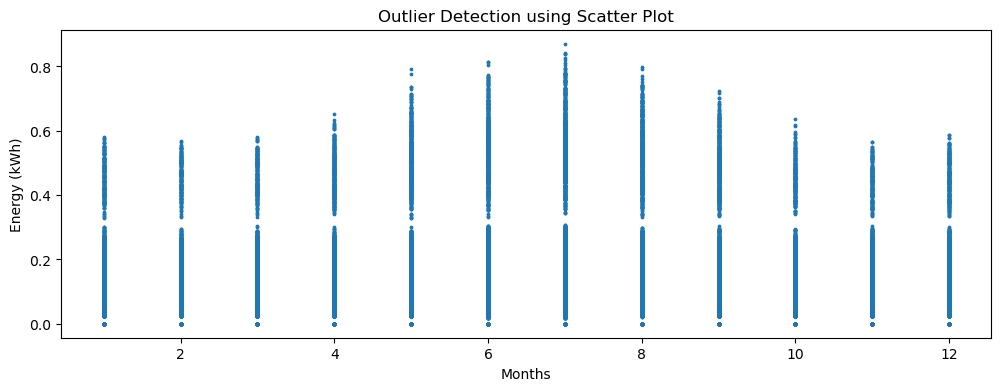

In [11]:
plt.figure(figsize=(12,4))
plt.scatter(df_initial['timestamp'].dt.month, df_initial['energy_kWh'], s = 3)
plt.title("Outlier Detection using Scatter Plot")
plt.xlabel('Months')
plt.ylabel('Energy (kWh)')
plt.savefig(FIG_PATH+'\Energy_Month_Wise.png')
plt.show()

### no outlier observed

## distribution plots wrt different features

In [12]:
df_subset1 = df_initial.pivot_table(index='device_type', values='energy_kWh', aggfunc='sum')
df_subset1.round(2)

,energy_kWh
device_type,
air_conditioner,13001.83
fridge,23248.45
light,3539.48
tv,7448.75
washer,5315.65


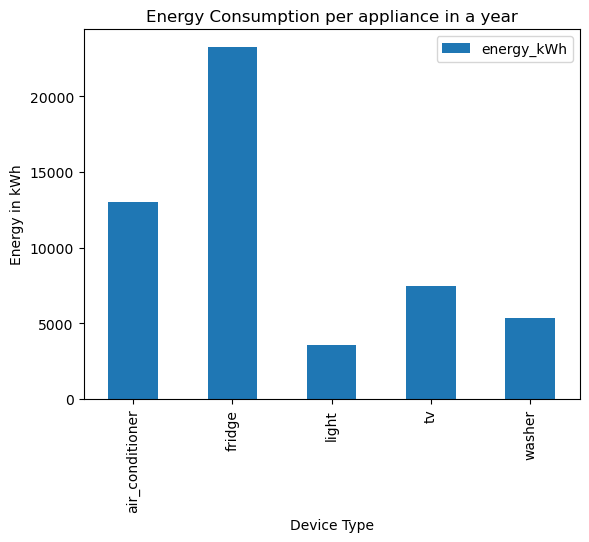

In [13]:
df_subset1.plot(kind='bar')
plt.title('Energy Consumption per appliance in a year')
plt.xlabel('Device Type')
plt.ylabel('Energy in kWh')
plt.savefig(FIG_PATH+'\Energy_Appliance_Wise.png')
plt.show()

#### Here it is clearly seen the order of energy consumption in appliance: fridge > air_conditioner > tv > washer > light

In [14]:
df_subset2 = df_initial.pivot_table(index='activity', columns='device_type', values='energy_kWh', aggfunc='sum')
df_subset2.round(2)

device_type,air_conditioner,fridge,light,tv,washer
activity,,,,,
away,803.07,4821.68,153.43,350.79,700.70
cooking,3871.85,3937.49,1276.43,296.00,1084.80
idle,2470.21,2071.30,152.74,150.47,572.87
sleeping,1400.06,7989.06,231.36,559.09,1661.87
watching_tv,4456.64,4428.91,1725.52,6092.40,1295.40


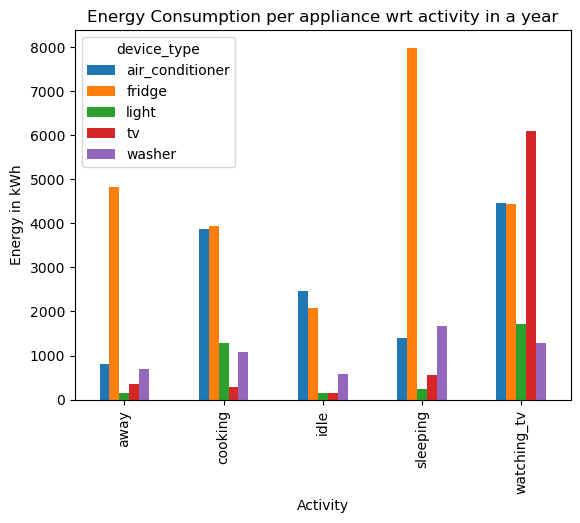

In [15]:
df_subset2.plot(kind='bar')
plt.title('Energy Consumption per appliance wrt activity in a year')
plt.xlabel('Activity')
plt.ylabel('Energy in kWh')
plt.savefig(FIG_PATH+'\Energy_Per_Device_Activity_Wise.png')
plt.show()

#### from above plot we can infer which device is majorly used for a certain activity like an association rule

In [16]:
df_subset3 = df_initial.pivot_table(index='user_present', columns='device_type', values='energy_kWh', aggfunc='sum')
df_subset3.round(2)

device_type,air_conditioner,fridge,light,tv,washer
user_present,,,,,
0,803.07,4821.68,153.43,350.79,700.70
1,12198.76,18426.76,3386.05,7097.96,4614.94


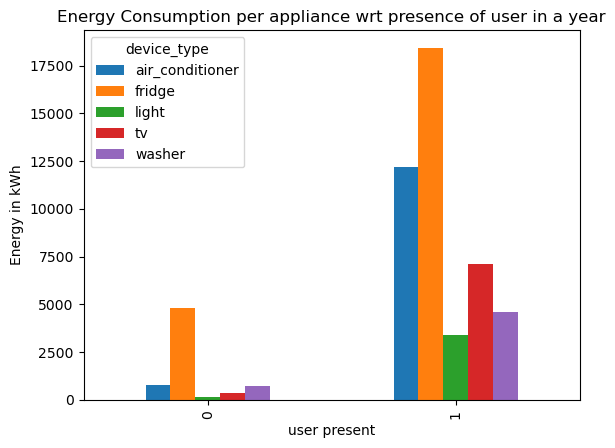

In [17]:
df_subset3.plot(kind='bar')
plt.title('Energy Consumption per appliance wrt presence of user in a year')
plt.xlabel('user present')
plt.ylabel('Energy in kWh')
plt.savefig(FIG_PATH+'\Energy_Per_Device_User_Presence_Wise.png')
plt.show()

#### the above plot shows that fridge is always in use irrespective of user presence

In [18]:
df_subset4 = df_initial.pivot_table(index='status', columns='device_type', values='energy_kWh', aggfunc='sum') # some devices consume energy even when off
df_subset4.round(2)

device_type,air_conditioner,fridge,light,tv,washer
status,,,,,
off,0.00,NaN,0.00,0.00,0.00
on,13001.83,23248.45,3539.48,7448.75,5315.65


### there is no device here that consumes energy when off

In [19]:
df_subset5 = df_initial.pivot_table(index='hour_of_day', columns='device_type', values='energy_kWh', aggfunc='sum')
df_subset5.round(2)

device_type,air_conditioner,fridge,light,tv,washer
hour_of_day,,,,,
0,158.53,1000.05,97.34,70.82,139.99
1,142.36,1002.17,30.89,69.48,141.92
2,153.64,1000.74,30.10,69.47,126.74
3,152.70,1005.37,28.04,71.74,139.75
4,144.41,996.14,29.27,71.70,142.34
5,138.14,999.31,68.53,69.61,145.22
6,141.96,1000.57,233.94,71.42,387.80
7,182.06,1001.42,168.40,74.26,387.77
8,275.64,994.88,30.90,156.07,246.50


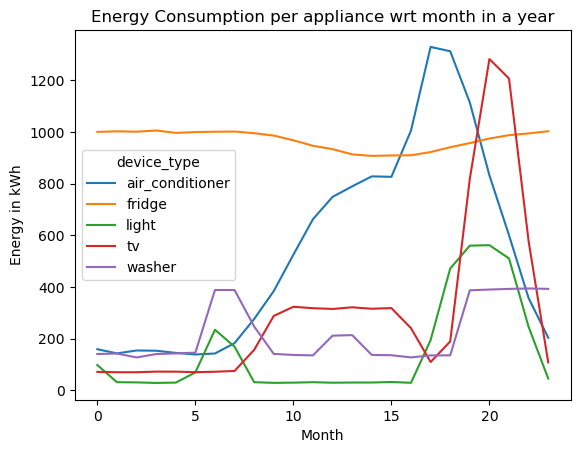

In [20]:
df_subset5.plot(kind='line',) 
plt.title('Energy Consumption per appliance wrt month in a year') 
plt.xlabel('Month') 
plt.ylabel('Energy in kWh') 
plt.savefig(FIG_PATH+'\Energy_Per_Device_Month_Wise.png')
plt.show()

#### the above plot shows the use/consumption of which device spikes up or drops down during a certain month of year

In [21]:
df_subset5 = df_initial.pivot_table(index='room', columns='device_type', values='energy_kWh', aggfunc='sum')
df_subset5.round(2)

device_type,air_conditioner,fridge,light,tv,washer
room,,,,,
bedroom,13001.83,NaN,NaN,NaN,NaN
kitchen,NaN,23248.45,NaN,NaN,NaN
laundry_room,NaN,NaN,NaN,NaN,5315.65
living_room,NaN,NaN,3539.48,7448.75,NaN


### from the above table it can be inferred that air_conditioner is installed in bedrooms only, fridge in kitchen, washer in laundery room while both light and tv are in living room

In [22]:
df_subset6 = df_initial.pivot_table(index='day_of_week', columns='device_type', values='energy_kWh', aggfunc='sum')
weekdays={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df_subset6.index = df_subset6.index.map(weekdays)
df_subset6.round(2)

device_type,air_conditioner,fridge,light,tv,washer
day_of_week,,,,,
Monday,1471.41,3298.33,541.05,1072.53,738.38
Tuesday,1490.25,3313.36,521.87,1057.42,730.77
Wednesday,1524.76,3311.07,509.49,1064.57,726.06
Thursday,1571.67,3326.80,496.72,1058.90,724.06
Friday,1572.81,3310.20,498.31,1062.52,722.74
Saturday,2689.86,3384.52,492.65,1075.67,847.47
Sunday,2681.08,3304.16,479.40,1057.14,826.18


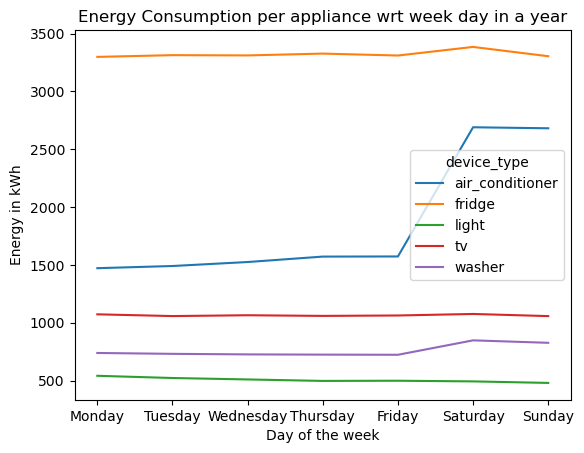

In [23]:
df_subset6.plot(kind='line')
plt.title('Energy Consumption per appliance wrt week day in a year') 
plt.xlabel('Day of the week') 
plt.ylabel('Energy in kWh') 
plt.savefig(FIG_PATH+'\Energy_Per_Device_WeekDay_Wise.png')
plt.show()

#### this plot shows the spike in the use of air conditioner and slight spike in use of washer near the weekends, others are used steadily throughout the week

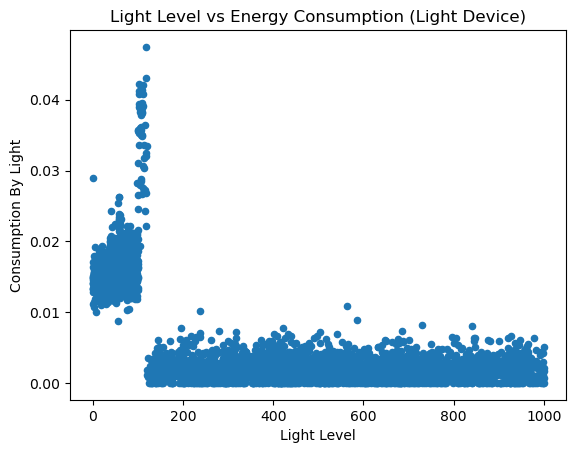

In [24]:
df_subset7 = df_initial[df_initial['device_type'] == 'light'] 
df_subset7 = df_subset7.pivot_table(index='light_level', values='energy_kWh', aggfunc='mean') 
df_subset7=df_subset7.reset_index()
df_subset7.plot(kind='scatter', x='light_level', y='energy_kWh')
plt.title('Light Level vs Energy Consumption (Light Device)') 
plt.xlabel('Light Level') 
plt.ylabel('Consumption By Light') 
plt.savefig(FIG_PATH+'\Light_level_light_consumption.png')
plt.show()

#### from above plot it can be concluded that when light level is low naturally the consumption of electricity by light device is high.

## observing relation between values of 'price_kWh' and other features

In [25]:
df_initial['price_kWh'].describe()

count    1.752000e+06
mean     2.250000e+03
std      5.590172e+02
min      1.500000e+03
25%      1.500000e+03
50%      2.500000e+03
75%      2.500000e+03
max      3.000000e+03
Name: price_kWh, dtype: float64

In [26]:
for attr in df_initial.columns:
    if attr != 'energy_kWh' and (df_initial[attr].dtype != object):
        print(df_initial[[attr, 'energy_kWh']].corr())
        print()

             home_id  energy_kWh
home_id     1.000000   -0.046145
energy_kWh -0.046145    1.000000

            timestamp  energy_kWh
timestamp    1.000000    0.008793
energy_kWh   0.008793    1.000000

            power_watt  energy_kWh
power_watt         1.0         1.0
energy_kWh         1.0         1.0

              user_present  energy_kWh
user_present      1.000000    0.108452
energy_kWh        0.108452    1.000000

             indoor_temp  energy_kWh
indoor_temp     1.000000    0.136976
energy_kWh      0.136976    1.000000

              outdoor_temp  energy_kWh
outdoor_temp      1.000000    0.136327
energy_kWh        0.136327    1.000000

            humidity  energy_kWh
humidity    1.000000   -0.044761
energy_kWh -0.044761    1.000000

             light_level  energy_kWh
light_level     1.000000    0.019396
energy_kWh      0.019396    1.000000

             day_of_week  energy_kWh
day_of_week     1.000000    0.031299
energy_kWh      0.031299    1.000000

             hour_o

In [27]:
df_subset8 = df_initial.pivot_table(index='hour_of_day', values='price_kWh', aggfunc='sum')
df_subset8.round(2)

,price_kWh
hour_of_day,
0,109500000
1,109500000
2,109500000
3,109500000
4,109500000
5,109500000
6,182500000
7,182500000
8,182500000


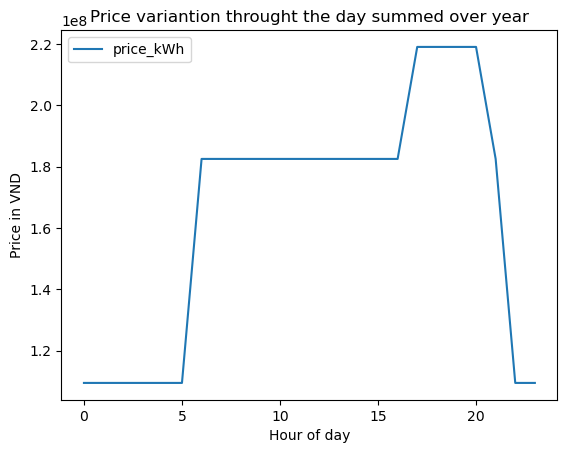

In [28]:
df_subset8.plot(kind='line')
plt.title('Price variantion throught the day summed over year') 
plt.xlabel('Hour of day') 
plt.ylabel('Price in VND') 
plt.savefig(FIG_PATH+'\VND_price_Distribution.png')
plt.show()

In [29]:
df_subset9 = df_initial.pivot_table(index='home_id', values='price_kWh', aggfunc='sum')
df_subset9

,price_kWh
home_id,
1,394200000
2,394200000
3,394200000
4,394200000
5,394200000
6,394200000
7,394200000
8,394200000
9,394200000


### While the 'price_kWh' shows appropriate distribution and correlation eith other features, the original dataset follows VND currency so these values might make sense by that country standards but seems incomprehensible for indian (INR) standards. 
## Hence, dropping 'price_kWh'

In [30]:
df_initial.drop('price_kWh', axis=1, inplace=True)

Text(0, 0.5, 'frequency')

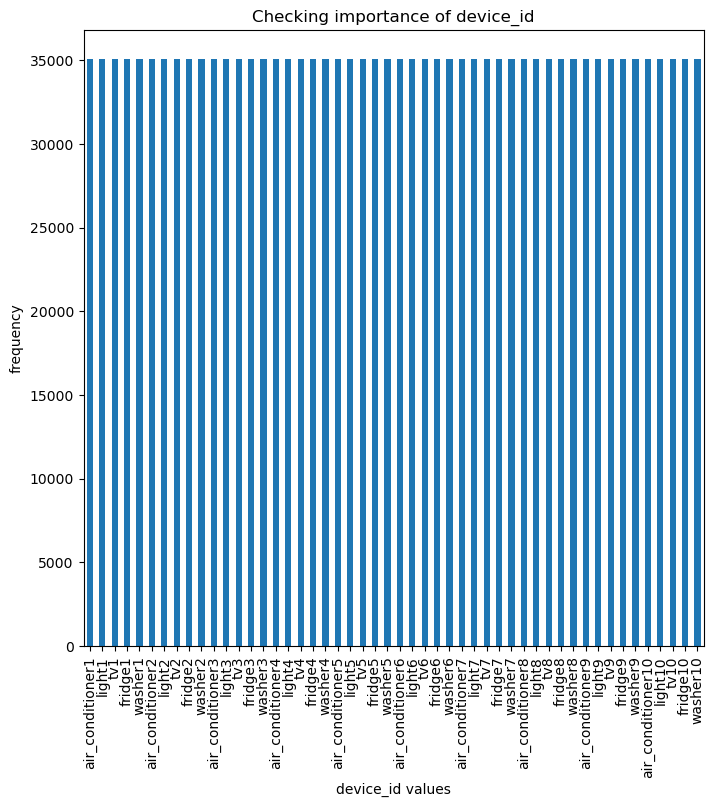

In [31]:
df_initial['device_id'].value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Checking importance of device_id') 
plt.xlabel('device_id values') 
plt.ylabel('frequency') 

#### 'device_id' is dropped because it is just a unique identifier with no predictive meaning also the value represnted by this is same as 'device_type' since each home has equal no.of devices.
#### 'home_id' is retained because the dataset logs the same device_type across multiple houses,
#### so keeping 'home_id' is necessary to distinguish identical timestamps and devices from different homes.

In [32]:
df_initial.drop('device_id', axis=1, inplace=True)

## Checking imbalance in record enteries

#### since the timestamp-appliance follow a panel-logging system, there will be balanced entries for the columns: timestamp, home_id, device_id, device_type, room, day_of_week and hour_of_day

### appliance-wise status imbalance

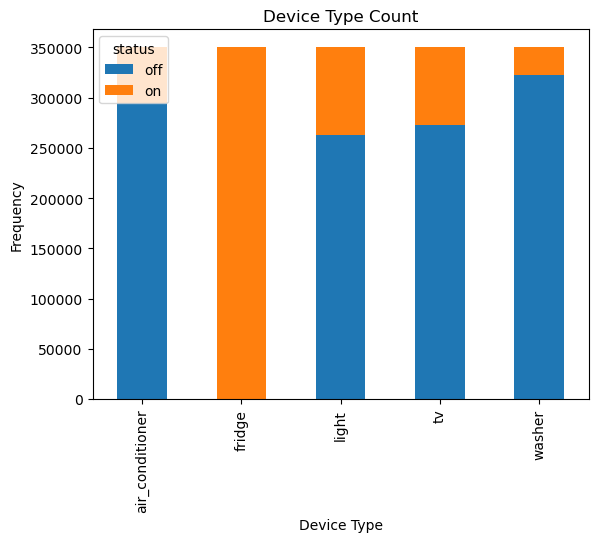

In [33]:
pd.crosstab(df_initial['device_type'], df_initial['status']).plot(kind='bar', stacked=True)
plt.title('Device Type Count')
plt.xlabel('Device Type')
plt.ylabel('Frequency')
plt.show()

#### here it is observed that fridge is never off and so always consumes energy

In [34]:
activity_count = df_initial['activity'].value_counts()
activity_count

activity
sleeping       582955
away           373780
watching_tv    335850
cooking        300395
idle           159020
Name: count, dtype: int64

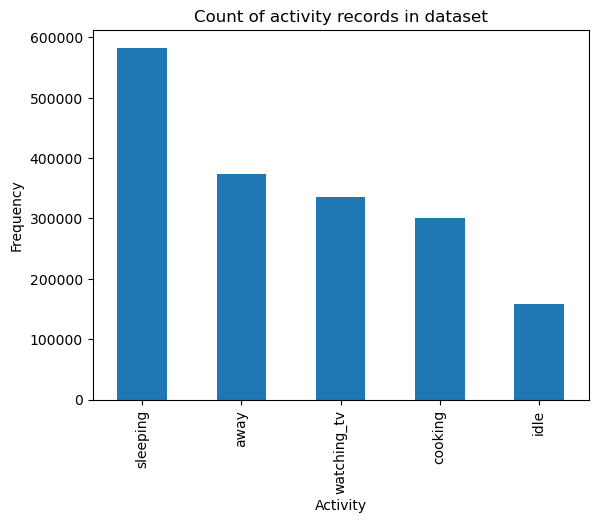

In [35]:
activity_count.plot(kind='bar')
plt.title('Count of activity records in dataset') 
plt.xlabel('Activity') 
plt.ylabel('Frequency') 
plt.savefig(FIG_PATH+'\Activity_Record_Value_Count.png')
plt.show()

#### From above, it can be concluded that sleeping is the most dominant activity in dataset
##### frquency order: sleeping > away > watching_tv > cooking > idle

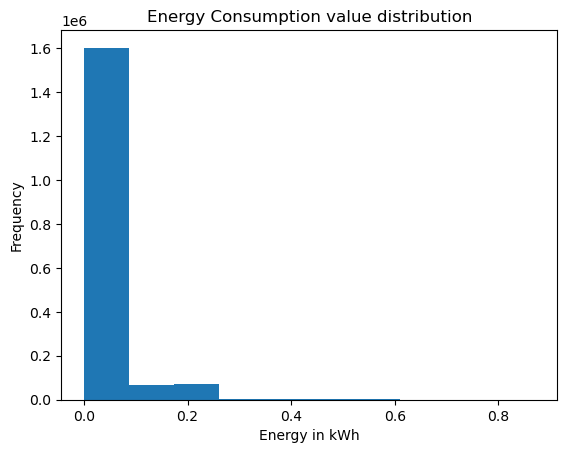

In [36]:
df_initial['energy_kWh'].plot(kind='hist')
plt.title('Energy Consumption value distribution') 
plt.xlabel('Energy in kWh') 
plt.ylabel('Frequency') 
plt.savefig(FIG_PATH+'\Energy_Consumption_Distribution_Initial.png')
plt.show()

#### Most 15-minute intervals show very low energy use, while only a few intervals spike because of heavy appliances like ACs, washers, and fridges.
#### This kind of skewed pattern is normal in smart-home data and will be taken care of during normalization in later stages.

In [37]:
df_initial['energy_kWh'].describe().round(2)

count    1752000.00
mean           0.03
std            0.06
min            0.00
25%            0.00
50%            0.00
75%            0.05
max            0.87
Name: energy_kWh, dtype: float64

## Balanced Dataset For Plot

#### Since the dataset follows panel-logging system the count of timestamps, home_id, device_id, device_type, hour_of_day, and day_of_week values are equal
#### The room values might be unequal for living room has 2 devices while the others have 1
#### for other categorical values (status, user_present, and activity) sample creation:
#### Identifying the minimum value count for equal-sized samples

In [38]:
df_initial['status'].value_counts()

status
off    1151365
on      600635
Name: count, dtype: int64

In [39]:
df_initial['user_present'].value_counts()

user_present
1    1378220
0     373780
Name: count, dtype: int64

In [40]:
df_initial['activity'].value_counts()

activity
sleeping       582955
away           373780
watching_tv    335850
cooking        300395
idle           159020
Name: count, dtype: int64

#### 1,00,000 samples can be taken for each attribute value

In [41]:
on_sample = df_initial[df_initial['status']=='on'].sample(100000)
off_sample = df_initial[df_initial['status']=='off'].sample(100000)

user_present_sample = df_initial[df_initial['user_present']==1].sample(100000)
user_absent_sample = df_initial[df_initial['user_present']==0].sample(100000)

sleeping_sample = df_initial[df_initial['activity']=='sleeping'].sample(100000)
away_sample = df_initial[df_initial['activity']=='away'].sample(100000)
watching_tv_sample = df_initial[df_initial['activity']=='watching_tv'].sample(100000)
cooking_sample = df_initial[df_initial['activity']=='cooking'].sample(100000)
idle_sample = df_initial[df_initial['activity']=='idle'].sample(100000)

#### obtain balanced datset by concatenating the equal sized samples:

In [42]:
df_status_balanced = pd.concat([on_sample, off_sample])
df_user_balanced = pd.concat([user_present_sample, user_absent_sample])
df_activity_balanced = pd.concat([
    sleeping_sample, away_sample, watching_tv_sample, cooking_sample, idle_sample
])

##### 1. balanced status value count plot

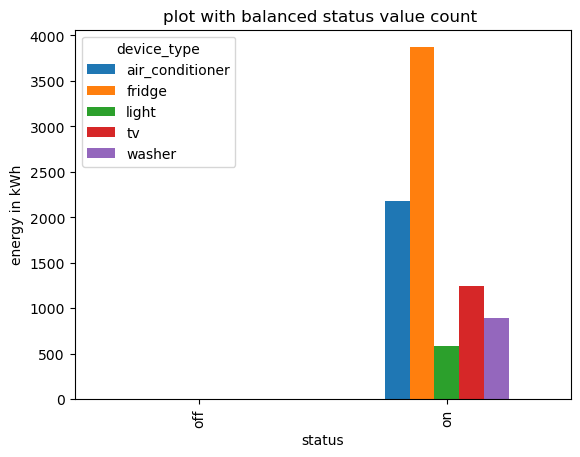

In [43]:
pivot_table1=df_status_balanced.pivot_table(index='status', columns='device_type', values='energy_kWh', aggfunc='sum')
pivot_table1.plot(kind='bar')
plt.title('plot with balanced status value count ')
plt.xlabel('status')
plt.ylabel('energy in kWh')
plt.savefig(FIG_PATH+'\Balanced_wrt_status.png')

##### 2. balanced user presence value count plot

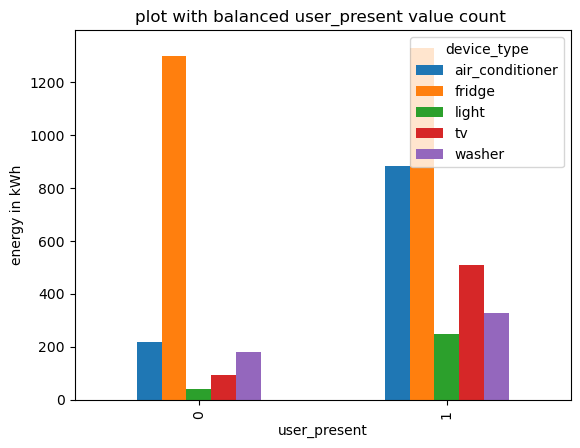

In [44]:
pivot_table2=df_user_balanced.pivot_table(index='user_present', columns='device_type', values='energy_kWh', aggfunc='sum')
pivot_table2.plot(kind='bar')
plt.title('plot with balanced user_present value count ')
plt.xlabel('user_present')
plt.ylabel('energy in kWh')
plt.savefig(FIG_PATH+'\Balanced_wrt_user_presence.png')

##### 3. balanced activity value count plot

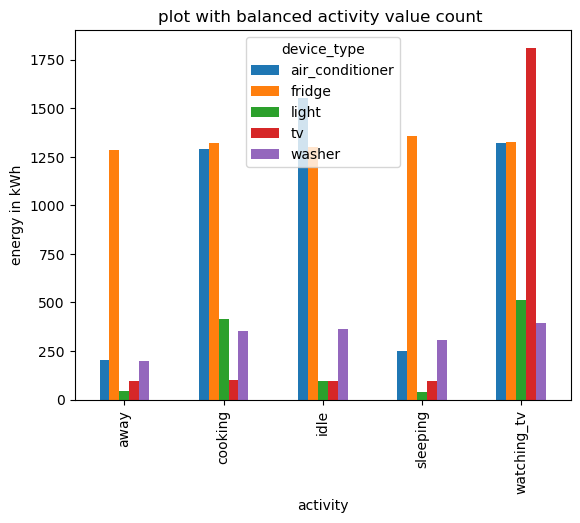

In [45]:
pivot_table3=df_activity_balanced.pivot_table(index='activity', columns='device_type', values='energy_kWh', aggfunc='sum')
pivot_table3.plot(kind='bar')
plt.title('plot with balanced activity value count ')
plt.xlabel('activity')
plt.ylabel('energy in kWh')
plt.savefig(FIG_PATH+'\Balanced_wrt_activity.png')

## Normalization and Standardization

In [46]:
df_initial.columns

Index(['home_id', 'timestamp', 'device_type', 'room', 'status', 'power_watt',
       'user_present', 'activity', 'indoor_temp', 'outdoor_temp', 'humidity',
       'light_level', 'day_of_week', 'hour_of_day', 'energy_kWh'],
      dtype='object')

In [47]:
num_cols = ['power_watt', 'indoor_temp', 'outdoor_temp', 'humidity', 'light_level']

for attr in num_cols:
    print(attr)
    print(df_initial[attr].describe())
    print()

power_watt
count    1.752000e+06
mean     1.199867e+02
std      2.252036e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.181600e+02
max      3.482295e+03
Name: power_watt, dtype: float64

indoor_temp
count    1.752000e+06
mean     2.119561e+01
std      8.014708e+00
min      2.200000e+00
25%      1.520000e+01
50%      2.030000e+01
75%      2.650000e+01
max      4.320000e+01
Name: indoor_temp, dtype: float64

outdoor_temp
count    1.752000e+06
mean     2.119547e+01
std      7.930646e+00
min      4.000000e+00
25%      1.520000e+01
50%      2.030000e+01
75%      2.650000e+01
max      4.120000e+01
Name: outdoor_temp, dtype: float64

humidity
count    1.752000e+06
mean     6.048777e+01
std      1.889061e+01
min      2.370000e+01
25%      4.510000e+01
50%      5.940000e+01
75%      7.170000e+01
max      1.000000e+02
Name: humidity, dtype: float64

light_level
count    1.752000e+06
mean     2.548263e+02
std      2.777288e+02
min      0.000000e+00
25%      4.710

### Descriptive statistics show that most numerical features (temperature, humidity, light level, energy) lie within naturally bounded ranges and exhibit skewness, especially due to zero-heavy power readings. Standardizing these variables (mean=0, std=1) would distort their physical interpretation, and create unnecessary negative values. Therefore, MinMaxScaler is more suitable as it preserves range relationships and scales all features proportionally between 0 and 1 without altering their real-world meaning.

In [48]:
non_num_cat = ['device_type', 'room', 'status', 'activity']

### OneHotEncoder is used for categorical features because they do not possess any inherent order, and encoding them as independent binary variables prevents the model from learning false numerical relationships.

In [49]:
other_cols = ['home_id', 'user_present', 'timestamp', 'day_of_week', 'hour_of_day', 'user_present']

### Above columns carry contextual or already-numeric info that doesn't need transformation, so they remain as-is.

In [50]:
df_initial['energy_kWh'].describe()

count    1.752000e+06
mean     2.999667e-02
std      5.630090e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.454000e-02
max      8.705738e-01
Name: energy_kWh, dtype: float64

In [51]:
target_col = ['energy_kWh']

## Note: `energy_kWh` is not scaled  
The target variable is left unchanged because:
- Models can directly learn from its natural scale  
- Scaling the target is only necessary for neural networks or extreme ranges  
- Keeping it raw makes evaluation metrics (MAE, RMSE) easier to interpret

In [52]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import joblib   # to save scaler/encoder

# scaling numerical value columns:
scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(df_initial[num_cols]), columns=num_cols, index=df_initial.index)

joblib.dump(scaler, "../saved_objects/scaler_minmax.joblib")

# Encoding labeled data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_array = encoder.fit_transform(df_initial[non_num_cat])
encoded_cols = encoder.get_feature_names_out(non_num_cat)
X_cat = pd.DataFrame(encoder.fit_transform(df_initial[non_num_cat]), columns=encoded_cols, index=df_initial.index)

joblib.dump(encoder, "../saved_objects/ohe_device_room_status_activity.joblib")

# Columns that do not need to undergo transformation
X_rem = df_initial[other_cols].copy()

# Concatenating all features after transformation
X = pd.concat([X_rem, X_num, X_cat], axis=1)

# Extracting the target variable for regression.
y = df_initial[target_col].copy()

print("Final feature shape:", X.shape)
print("Target shape:", y.shape)

Final feature shape: (1752000, 27)
Target shape: (1752000, 1)


In [53]:
X.head()

,home_id,user_present,timestamp,day_of_week,hour_of_day,user_present,power_watt,indoor_temp,outdoor_temp,humidity,...,room_kitchen,room_laundry_room,room_living_room,status_off,status_on,activity_away,activity_cooking,activity_idle,activity_sleeping,activity_watching_tv
0,1,1,2022-01-01,5,0,1,0.000000,0.22439,0.212366,0.281782,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,2022-01-01,5,0,1,0.030405,0.22439,0.212366,0.281782,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,1,2022-01-01,5,0,1,0.000000,0.22439,0.212366,0.281782,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,2022-01-01,5,0,1,0.064170,0.22439,0.212366,0.281782,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,2022-01-01,5,0,1,0.000000,0.22439,0.212366,0.281782,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
y.head()

,energy_kWh
0,0.000000
1,0.026470
2,0.000000
3,0.055865
4,0.000000


## Data Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10, shuffle=True
)

# Splitting the dataset so the model learns on 70% of data and is tested on the remaining 30%.
# 'random_state' ensures reproducibility, and 'shuffle=True' avoids any time-based ordering bias.
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (1226400, 27) (1226400, 1)
Test shape: (525600, 27) (525600, 1)


### Note: For hyperparameter tuning in later milestones, the current test set will be further split into validation and final test subsets.